In [ ]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 122.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras

### 🧵 Carga y preparación del conjunto Fashion MNIST

Se carga el conjunto de datos Fashion MNIST, que contiene imágenes de ropa clasificadas en 10 categorías. Luego, se normalizan los valores de píxel dividiéndolos entre 255, y se divide el conjunto de entrenamiento en una parte para validación (5000 ejemplos) y el resto para entrenamiento.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist #cargar fashion mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


X_train_full.dtype
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

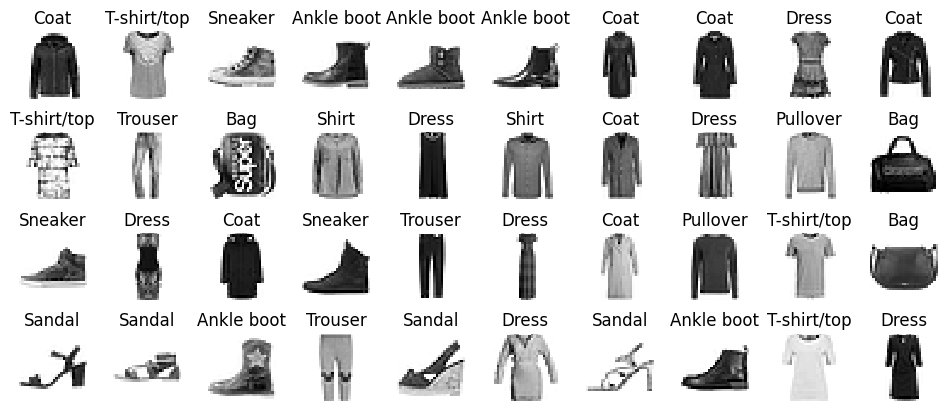

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

# **Implementación de modelo con diferentes valores de batch_sizes**

## Ejecución con GPU:


### 🧪 Entrenamiento del modelo con diferentes tamaños


Entrenando con batch_size=32...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenando con batch_size=64...
Entrenando con batch_size=128...
Entrenando con batch_size=256...
Entrenando con batch_size=512...
   batch_size  test_accuracy  avg_epoch_time (s)
0          32         0.8717            5.664504
1          64         0.8561            3.220172
2         128         0.8365            1.626248
3         256         0.8345            1.202607
4         512         0.8116            0.896004


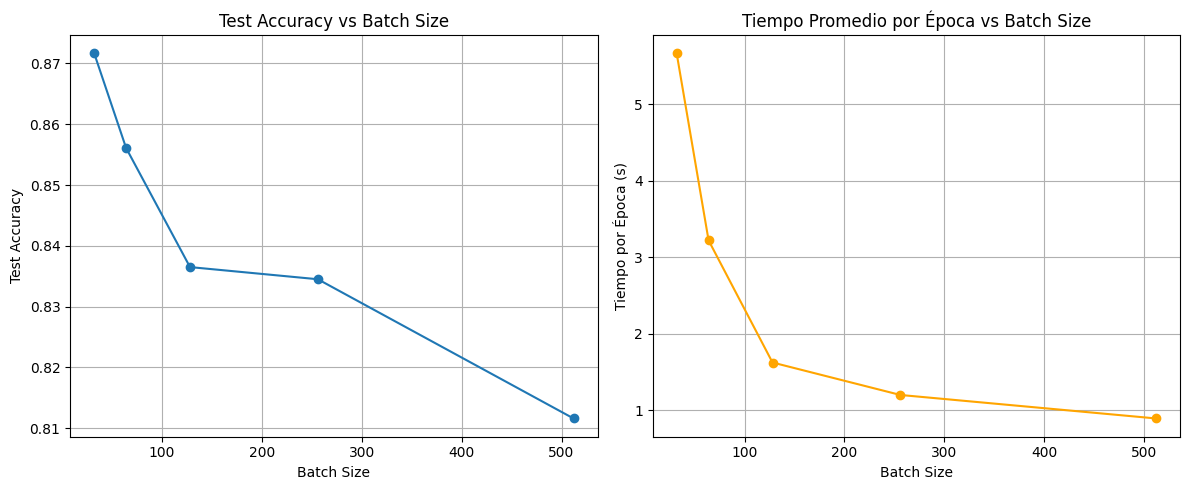

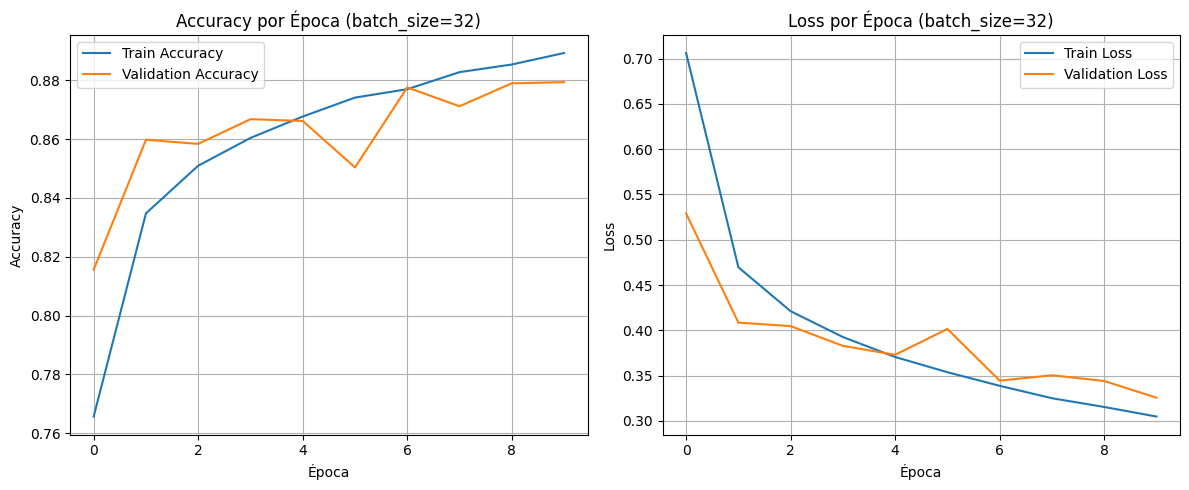

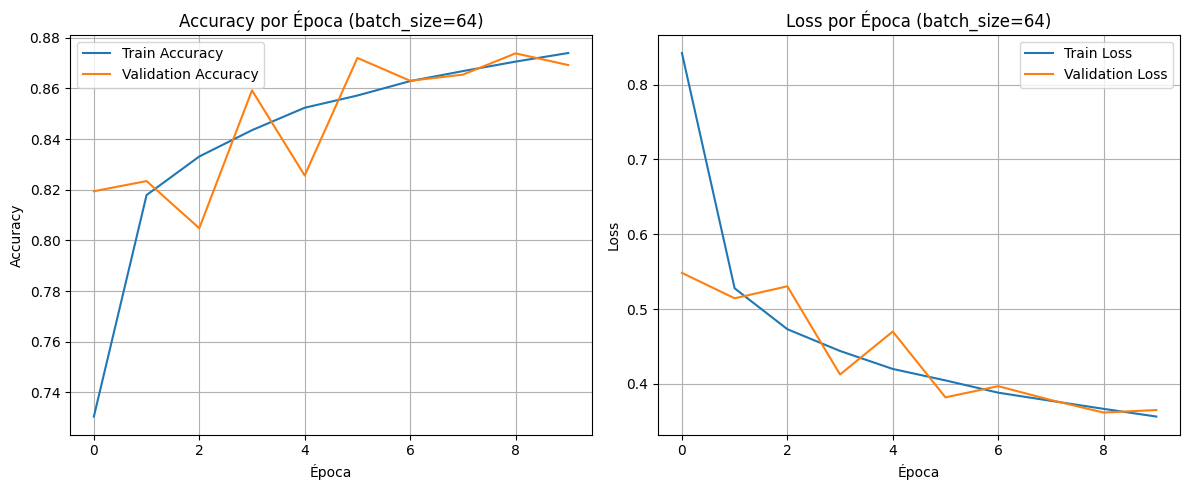

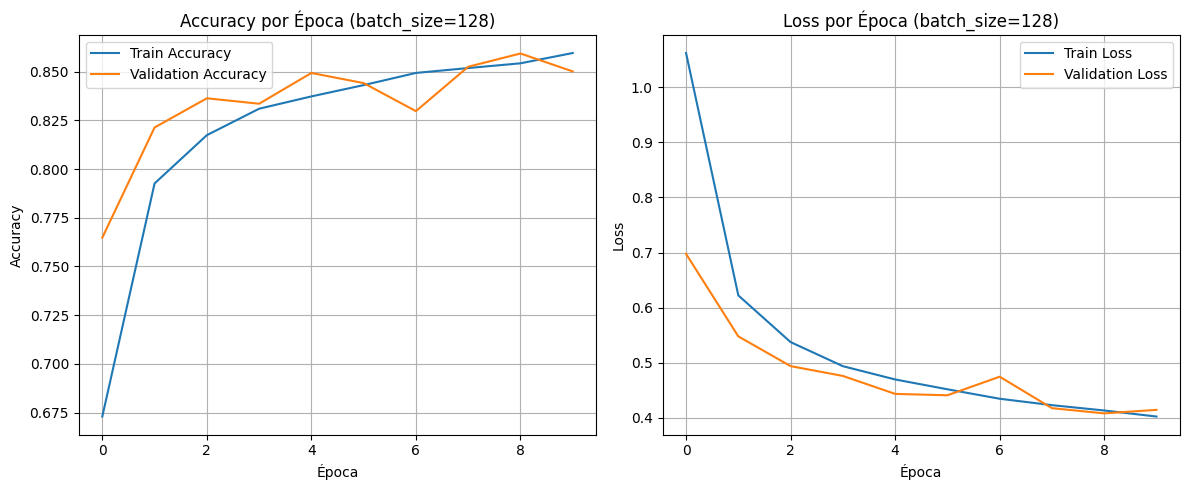

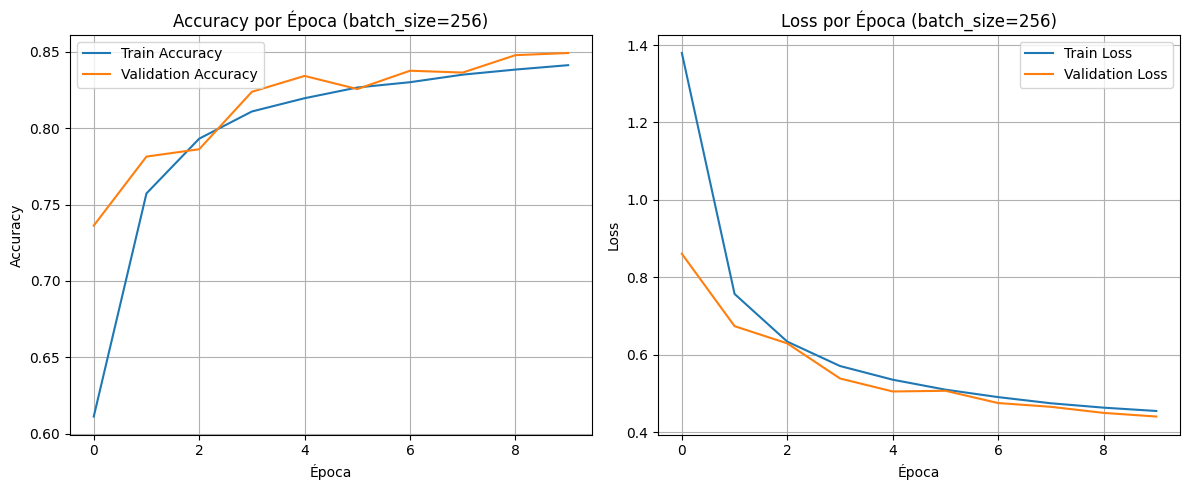

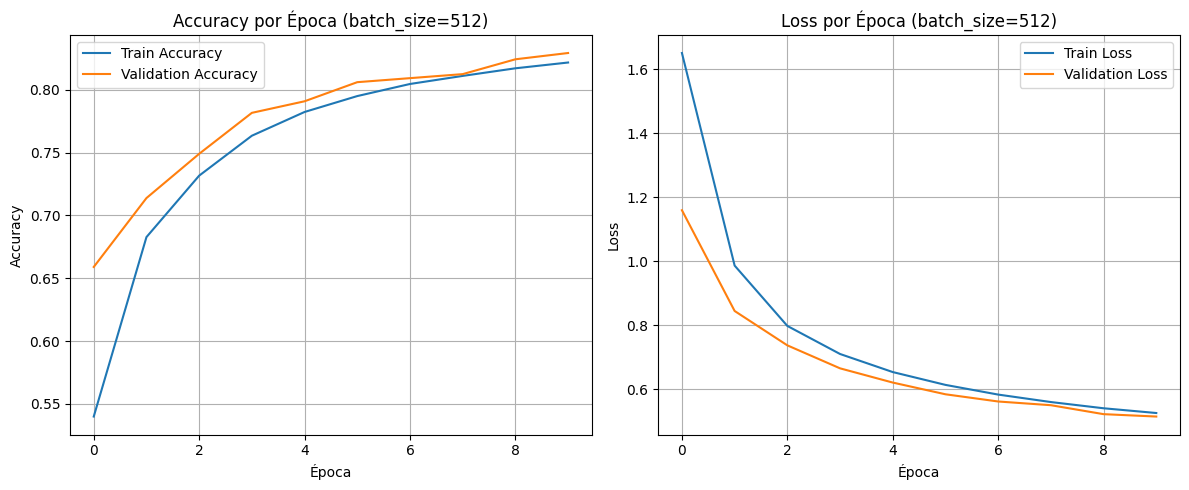

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Asegúrate de tener ya cargados y normalizados:
# X_train, y_train, X_valid, y_valid, X_test, y_test

batch_sizes = [32, 64, 128, 256, 512]
results = {
    "batch_size": [],
    "test_accuracy": [],
    "avg_epoch_time (s)": []
}

# Guardamos los histories para graficar después
histories = {}

for batch_size in batch_sizes:
    print(f"Entrenando con batch_size={batch_size}...")

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="sgd",
        metrics=["accuracy"]
    )

    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=batch_size,
        validation_data=(X_valid, y_valid),
        verbose=0
    )
    total_time = time.time() - start_time
    avg_epoch_time = total_time / 10

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    results["batch_size"].append(batch_size)
    results["test_accuracy"].append(test_accuracy)
    results["avg_epoch_time (s)"].append(avg_epoch_time)

    # Guardar history
    histories[batch_size] = pd.DataFrame(history.history)

# Convertir a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# --- Gráfica 1: Accuracy vs batch size y Tiempo promedio por época ---
plt.figure(figsize=(12, 5))

# Accuracy vs batch size
plt.subplot(1, 2, 1)
plt.plot(results_df["batch_size"], results_df["test_accuracy"], marker="o")
plt.title("Test Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Test Accuracy")
plt.grid(True)

# Tiempo promedio por época vs batch size
plt.subplot(1, 2, 2)
plt.plot(results_df["batch_size"], results_df["avg_epoch_time (s)"], marker="o", color="orange")
plt.title("Tiempo Promedio por Época vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Tiempo por Época (s)")
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Gráficas por batch_size de Accuracy y Loss por época ---
for batch_size, history_df in histories.items():
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_df["accuracy"], label="Train Accuracy")
    plt.plot(history_df["val_accuracy"], label="Validation Accuracy")
    plt.title(f"Accuracy por Época (batch_size={batch_size})")
    plt.xlabel("Época")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history_df["loss"], label="Train Loss")
    plt.plot(history_df["val_loss"], label="Validation Loss")
    plt.title(f"Loss por Época (batch_size={batch_size})")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


### ⚡️ Entrenamiento con TPU y análisis de batch size

En este bloque se configura automáticamente el uso de una TPU (si está disponible) para acelerar el entrenamiento. Se entrena una red neuronal sobre el conjunto Fashion MNIST con distintos tamaños de batch (32 a 512) usando `tf.data` para optimizar el flujo de datos.

Para cada batch size se mide:
- **Exactitud en test**.
- **Tiempo promedio por época**.

Los resultados se visualizan en dos gráficos comparativos y también se generan gráficos por separado del accuracy y loss a lo largo de las épocas. Esto permite evaluar cómo varía el rendimiento y la eficiencia del modelo con respecto al tamaño del lote, especialmente aprovechando el paralelismo de la TPU.


⚠️ TPU no detectada, se usará CPU/GPU.

Entrenando con batch_size=32...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Entrenando con batch_size=64...

Entrenando con batch_size=128...

Entrenando con batch_size=256...

Entrenando con batch_size=512...

📊 Resultados finales:
   batch_size  test_accuracy  avg_epoch_time (s)
0          32         0.8678            4.946747
1          64         0.8491            3.755359
2         128         0.8430            2.655832
3         256         0.8265            3.490594
4         512         0.8015            3.349151


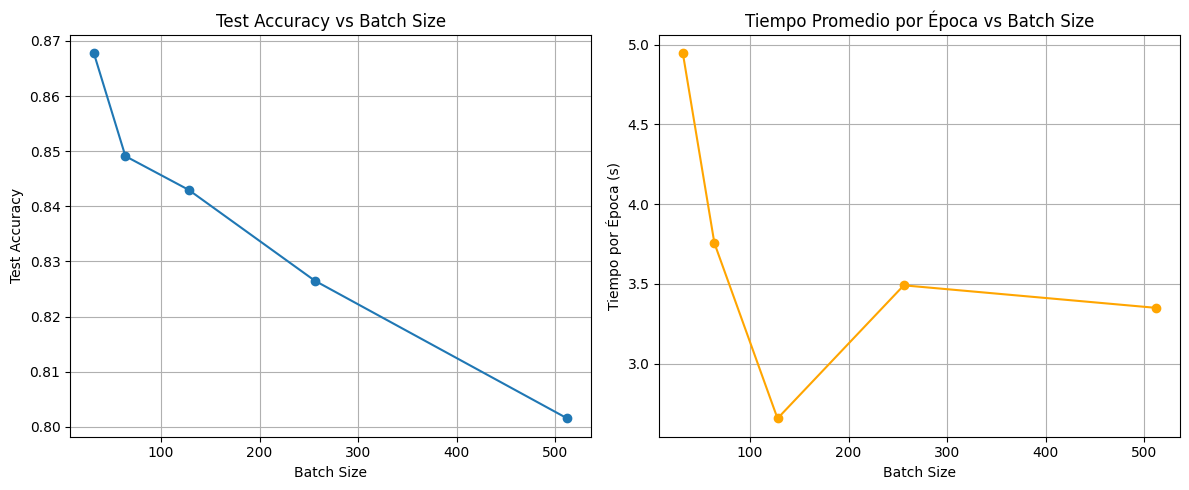

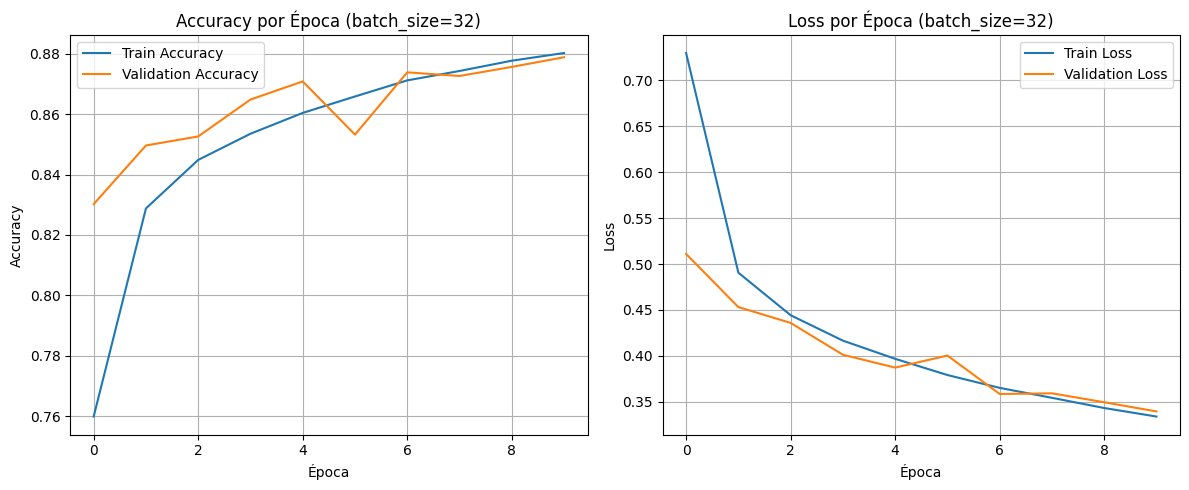

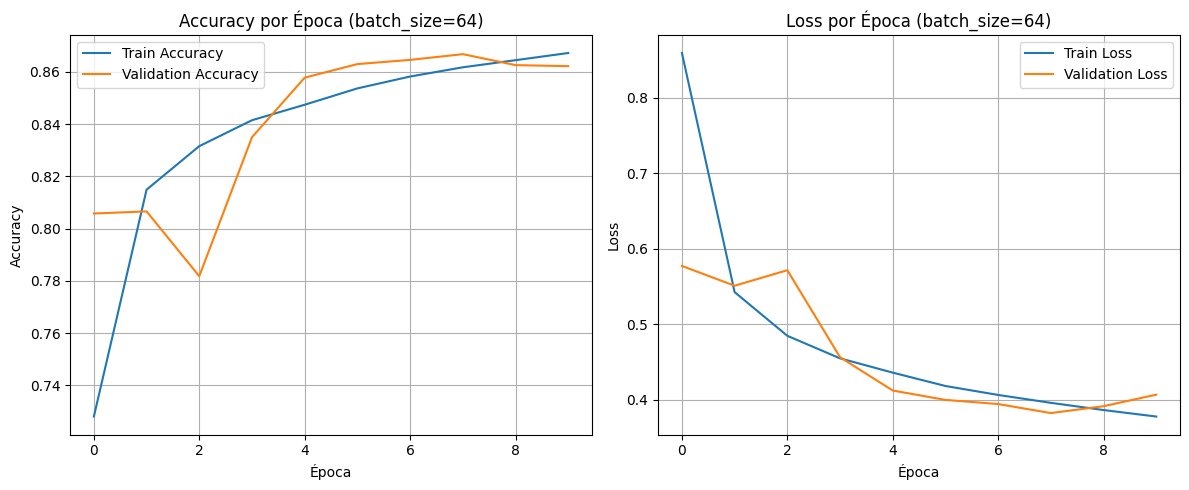

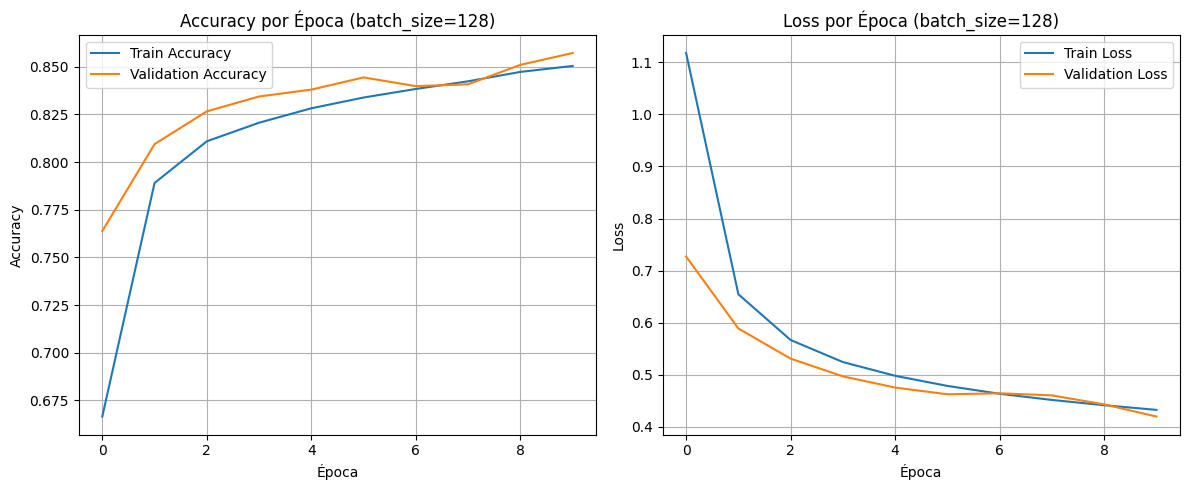

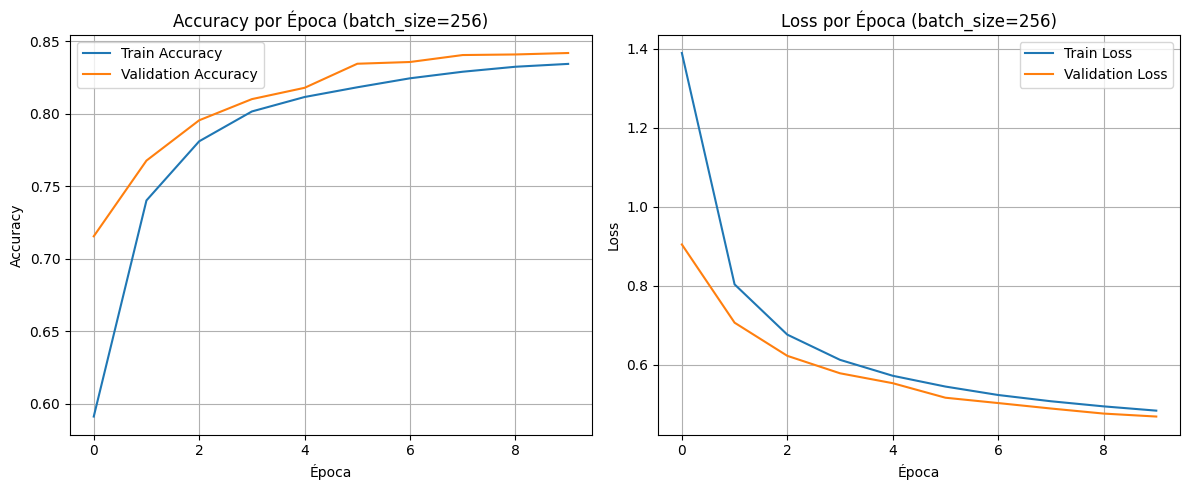

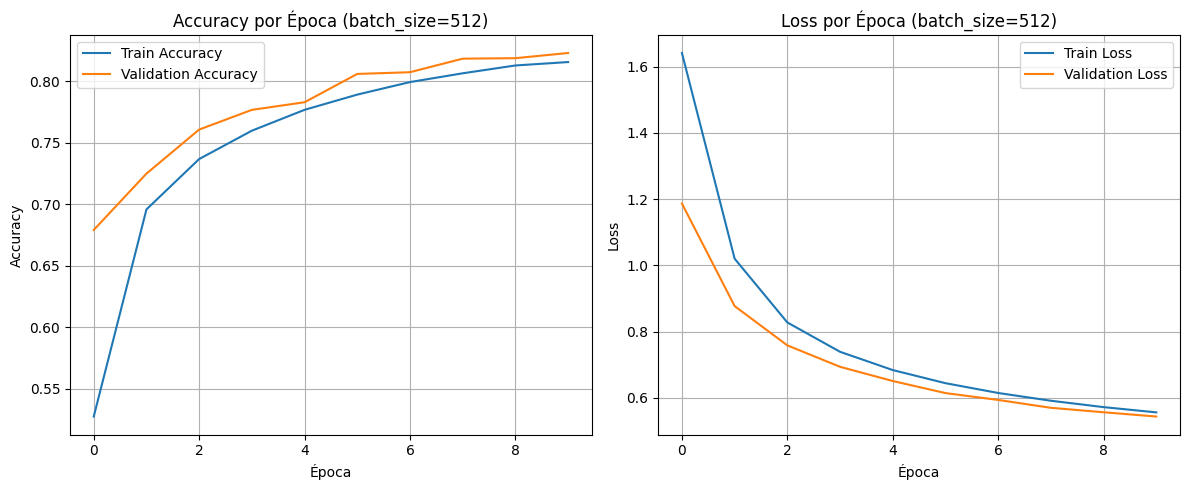

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# ===========================
# 1. Configurar estrategia TPU
# ===========================
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("✅ TPU detectada y configurada correctamente.")
except ValueError:
    strategy = tf.distribute.get_strategy()  # CPU/GPU fallback
    print("⚠️ TPU no detectada, se usará CPU/GPU.")



# ===========================
# 3. Definir tamaños de batch y resultados
# ===========================
batch_sizes = [32, 64, 128, 256, 512]
results = {
    "batch_size": [],
    "test_accuracy": [],
    "avg_epoch_time (s)": []
}
histories = {}

# ===========================
# 4. Entrenamiento con diferentes batch sizes
# ===========================
for batch_size in batch_sizes:
    print(f"\nEntrenando con batch_size={batch_size}...")

    # Crear dataset eficiente
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(batch_size).prefetch(1)
    valid_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(batch_size).prefetch(1)

    with strategy.scope():
        model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[28, 28]),
            keras.layers.Dense(300, activation="relu"),
            keras.layers.Dense(100, activation="relu"),
            keras.layers.Dense(10, activation="softmax")
        ])

        model.compile(
            loss="sparse_categorical_crossentropy",
            optimizer="sgd",
            metrics=["accuracy"]
        )

    # Entrenar modelo
    start_time = time.time()
    history = model.fit(
        train_ds,
        validation_data=valid_ds,
        epochs=10,
        verbose=0
    )
    total_time = time.time() - start_time
    avg_epoch_time = total_time / 10

    # Evaluar en test
    test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(1)
    test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)

    # Guardar resultados
    results["batch_size"].append(batch_size)
    results["test_accuracy"].append(test_accuracy)
    results["avg_epoch_time (s)"].append(avg_epoch_time)
    histories[batch_size] = pd.DataFrame(history.history)

# ===========================
# 5. Mostrar tabla de resultados
# ===========================
results_df = pd.DataFrame(results)
print("\n📊 Resultados finales:")
print(results_df)

# ===========================
# 6. Visualización de comparación entre batch sizes
# ===========================
plt.figure(figsize=(12, 5))

# Test Accuracy vs Batch Size
plt.subplot(1, 2, 1)
plt.plot(results_df["batch_size"], results_df["test_accuracy"], marker="o")
plt.title("Test Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Test Accuracy")
plt.grid(True)

# Tiempo promedio por época vs Batch Size
plt.subplot(1, 2, 2)
plt.plot(results_df["batch_size"], results_df["avg_epoch_time (s)"], marker="o", color="orange")
plt.title("Tiempo Promedio por Época vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Tiempo por Época (s)")
plt.grid(True)

plt.tight_layout()
plt.show()

# ===========================
# 7. Gráficas individuales de accuracy y loss por época
# ===========================
for batch_size, history_df in histories.items():
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_df["accuracy"], label="Train Accuracy")
    plt.plot(history_df["val_accuracy"], label="Validation Accuracy")
    plt.title(f"Accuracy por Época (batch_size={batch_size})")
    plt.xlabel("Época")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history_df["loss"], label="Train Loss")
    plt.plot(history_df["val_loss"], label="Validation Loss")
    plt.title(f"Loss por Época (batch_size={batch_size})")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
